In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import random
import scipy.spatial.distance as metric
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
def euclidean_dist(A, B):
    return metric.euclidean(A, B)

def plot(data,k,index,centroids,orig_centroids):
    plt.figure(figsize=(10,7))
    input = []
    for i in range(len(index)):
        for j in index[i]:
            input.append(int(j))
            
    # colors = 10*["g","r","c","orange","b","k"]
    colors = 10*["olivedrab",'chocolate','c','crimson','steelblue','orangered','mediumpurple','goldenrod','indigo','coral','powderblue','firebrick','yellowgreen','orchid','skyblue','pink','springgreen','maroon','r','g','b','y']
    j=0
    for i in input:
        plt.scatter(data[j,0], data[j,1], color=colors[i], s=150, linewidths=0.2)
        j+=1
    ## New centroids
    for centroid in range(len(centroids)):
        New_centroids =plt.scatter(centroids[centroid][0],centroids[centroid][1],marker="x", color="orange", s=150,linewidths=10)
    # Original Clusters
    for centroid in range(len(orig_centroids)):
         Original_Clusters= plt.scatter(orig_centroids[centroid][0],orig_centroids[centroid][1],marker="D", color="darkBlue", s=150, linewidths=5)
    plt.legend((New_centroids,Original_Clusters),
           ('New_centroids', 'Original_Clusters'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
    plt.savefig(str(k)+".png")

In [ ]:
class K_Means:
    def __init__(self,k,data,centeriod_init=None):
        self.k = k
        self.data = data  
        self.centeriod_init = centeriod_init
        
        
    def initialise_centroids(self,centeriod_init,k,data):
        ## 3 ways to initialize centroides
        if(self.centeriod_init == 'random'): 
            initial_centroids = np.random.permutation(data.shape[0])[:self.k]
            self.centroids = data[initial_centroids]
        elif(self.centeriod_init == 'firstk'):
            self.centroids = data[:k]
        else:
          for i in range(self.k):
                self.centroids.append(i%self.k)
        return self.centroids    
 
    def fit(self,data):
        m = np.shape(data)[0]
        cluster_assignments = np.mat(np.zeros((m,2)))
        
        cents = self.initialise_centroids(self.centeriod_init,self.k,data)
        
        # Preserve original centroids
        cents_orig = cents.copy()
        changed = True
        num_iter = 0
        sse = []
        
        while changed and num_iter<100:
            changed = False 
            # for each row in the dataset
            for i in range(m):
               # Track minimum distance and vector index of associated cluster
                min_dist = np.inf
                min_index = -1 
                #calculate distance 
                for j in range(self.k):
                    dist_ji = euclidean_dist(cents[j,:],data[i,:])
                    if(dist_ji < min_dist):
                        min_dist = dist_ji
                        min_index = j 
                    # Check if cluster assignment of instance has changed
                    if cluster_assignments[i, 0] != min_index: 
                        changed = True

                # Assign instance to appropriate cluster
                cluster_assignments[i, :] = min_index, min_dist**2

            # Update centroid location
            for cent in range(self.k):
                points = data[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
                cents[cent,:] = np.mean(points, axis=0)
    
            # Count iterations
            num_iter += 1
            #print(num_iter)

            distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
            # cost = sum(distance)/(2*len(data))
            cost = sum(np.square(distance))
            cost = np.array(cost)
            cost =  cost.item()
            sse.append(cost)

         # Return important stuff when done
        return cents, cluster_assignments, num_iter, cents_orig,sse

In [ ]:
def plot_SSE(sse_arr,iters_num):
  plt.figure(figsize=(10,7))
  plt.plot(np.arange(iters_num), sse_arr, '-o',color='orangered')
  plt.xlabel("iteration #")
  plt.ylabel("SSE")
  plt.show()

In [ ]:
def cluster(dataset,k):
  kmeans = K_Means(k,data = dataset,centeriod_init='random')
  centroids, cluster_assignments, iters, orig_centroids,sse = kmeans.fit(dataset)
  print(iters)
  print(sse)
  index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,.... 
  distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
  plot(dataset,k,index,centroids,orig_centroids)
  plot_SSE(sse,iters)


In [ ]:
def find_best_k(dataset):
  costs = []
  for i in range(10):
      kmeans = K_Means(k=i,data = dataset,centeriod_init='random')
      centroids, cluster_assignments, iters, orig_centroids,sse = kmeans.fit(dataset)
      distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
      # cost = sum(distance)/(2*len(data))
      cost = sum(np.square(distance))
      cost = np.array(cost)
      cost =  cost.item()
      costs.append(cost)
      
  x = np.arange(10)
  plt.figure(figsize=(10,7))
  plt.plot(x,costs,'-o',c='m')
  plt.title("Elbow curve")
  plt.xlabel("K -->")
  plt.ylabel("SSE")

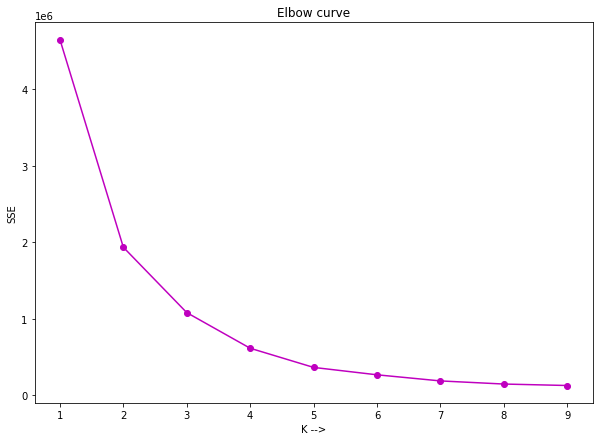

In [ ]:
data1 = pd.read_csv('/content/gdrive/MyDrive/Machine Learning/q1-data/data_kmeans_1.txt').values
find_best_k(data1)

100
[2369537.3430299666, 1794879.3919847396, 1825340.6153303934, 1857354.6631788414, 1881911.5659859902, 1900180.295944913, 1913157.947903801, 1921830.06995052, 1926358.1622267244, 1928844.2684688326, 1930375.83998805, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 1930638.060625385, 19

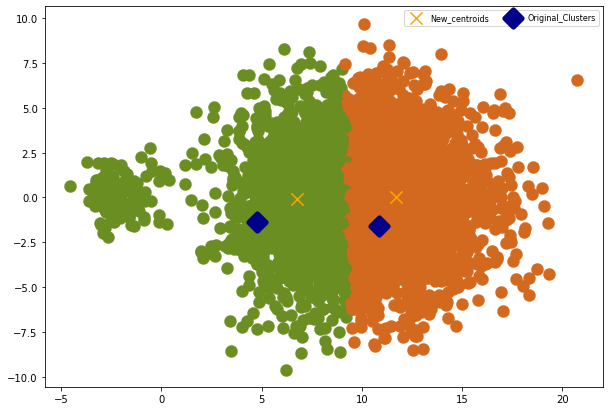

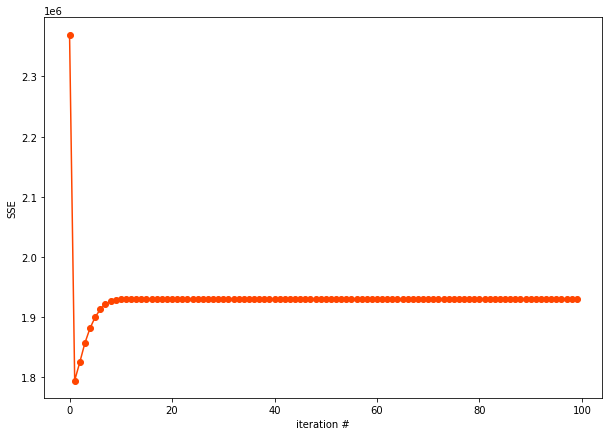

In [ ]:
cluster(data1,2)

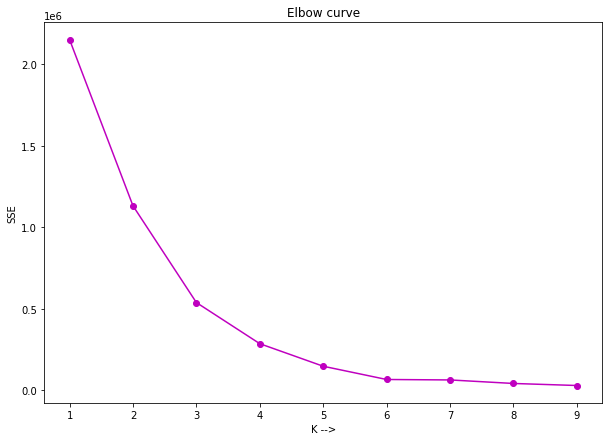

In [ ]:
data2 = pd.read_csv('/content/gdrive/MyDrive/Machine Learning/q1-data/data_kmeans_2.txt').values
find_best_k(data2)

100
[5174526.669314719, 1162174.5499990138, 1136150.089886143, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.0247195945, 1131892.024719594

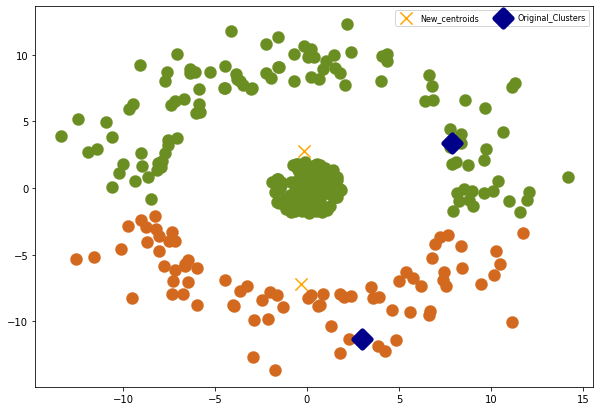

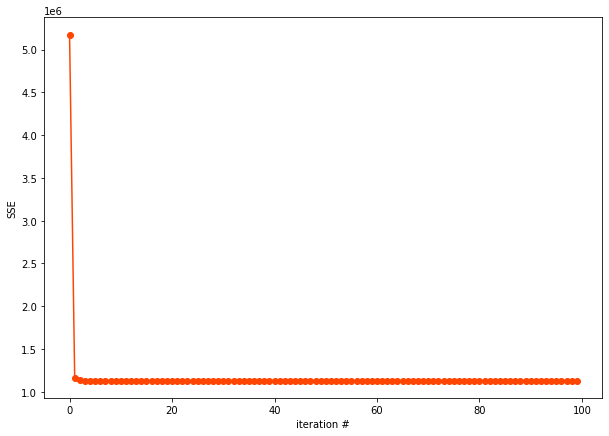

In [ ]:
cluster(data2,2)

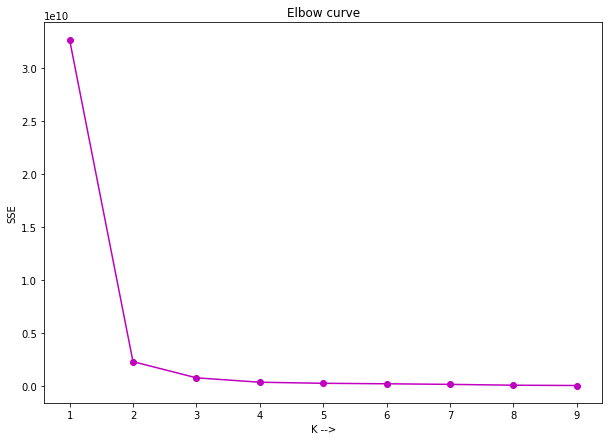

In [ ]:
data3 = pd.read_csv('/content/gdrive/MyDrive/Machine Learning/q1-data/data_kmeans_3.txt').values
find_best_k(data3)

100
[1605938225.0020142, 684073406.8384656, 721460374.6220776, 726295609.6066746, 725805120.4511139, 724996555.5207942, 724043685.6382732, 722064737.1454785, 718818624.9978323, 712934209.0754431, 706848153.1610737, 704558157.46724, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 703963193.4544026, 70396319

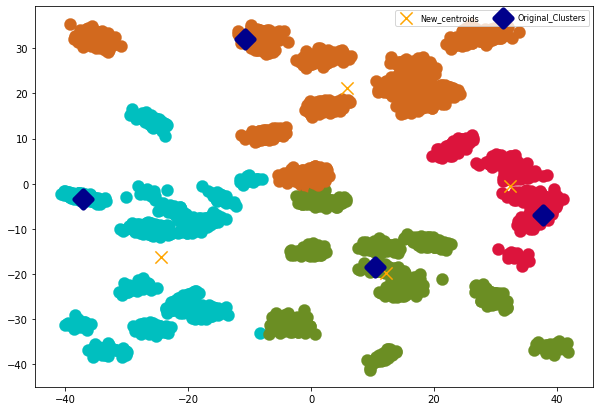

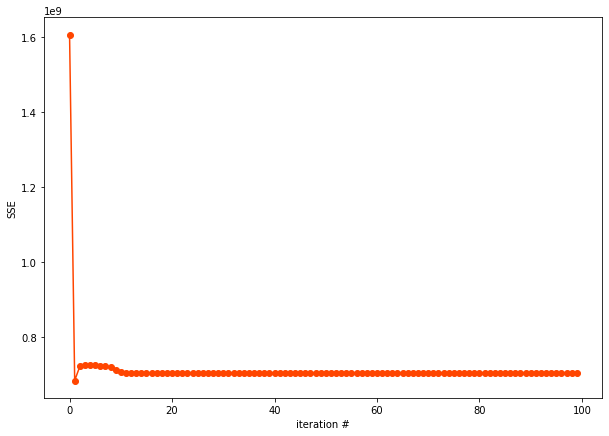

In [ ]:
cluster(data3,4)